In [1]:
import pandas as pd

## Задание 1 ##

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [141]:
ratings = pd.read_csv('C:/ml-25m/ratings.csv')

In [142]:
def class_movie(row):
    if row['rating'] <= 2:
        return 'lowest rating'
    
    elif row['rating'] <= 4:
        return 'average rating'
    
    else:
        return 'high rating'

In [143]:
ratings.shape

(25000095, 4)

In [144]:
%%time

ratings['class'] = ratings.apply(class_movie, axis=1)

Wall time: 6min 47s


In [145]:
ratings.head(10)

,userId,movieId,rating,timestamp,class
0,1,296,5.0,1147880044,high rating
1,1,306,3.5,1147868817,average rating
2,1,307,5.0,1147868828,high rating
3,1,665,5.0,1147878820,high rating
4,1,899,3.5,1147868510,average rating
5,1,1088,4.0,1147868495,average rating
6,1,1175,3.5,1147868826,average rating
7,1,1217,3.5,1147878326,average rating
8,1,1237,5.0,1147868839,high rating
9,1,1250,4.0,1147868414,average rating


## Задание 2 ##

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {


>'Центр': ['москва', 'тула', 'ярославль'],
>
>'Северо-Запад': ['петербург', 'псков', 'мурманск'],
>
>'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}


Результат классификации запишите в отдельный столбец region.

In [133]:
stats = pd.read_csv('keywords.csv')

In [134]:
def class_for_geo(row):
    if 'москв' in row.keyword.lower() or 'тула' in row.keyword.lower() or 'туле' in row.keyword.lower() or 'ярославл' in row.keyword.lower():
        return 'Центр'
    
    elif 'петербург' in row.keyword.lower() or 'псков' in row.keyword.lower() or 'мурманск' in row.keyword.lower():
        return 'Северо-Запад'
    
    elif 'владивосток' in row.keyword.lower() or 'сахалин' in row.keyword.lower() or 'хабаровск' in row.keyword.lower():
        return 'Дальний Восток'
    
    else:
        return 'undefined'
    

In [135]:
%%time

stats['region'] = stats.apply(class_for_geo, axis=1)

Wall time: 9.06 s


In [136]:
stats[stats.keyword.str.contains('Москва')].head()

,keyword,shows,region
127,авито Москва,979292,Центр


In [137]:
stats[stats.region.str.contains('Центр')].head(10)

,keyword,shows,region
127,авито Москва,979292,Центр
143,эхо москвы,889657,Центр
197,погода в москве,745745,Центр
414,погода в москве на 14 дней,400914,Центр
512,карта метро москвы,331857,Центр
584,схема метро москвы,374592,Центр
647,портал госуслуг москвы,263844,Центр
652,работа в москве,265000,Центр
792,метро москвы,221363,Центр
849,авито ярославль,209581,Центр


In [138]:
stats[stats.region.str.contains('Северо-Запад')].head(10)

,keyword,shows,region
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
1236,банк санкт петербург,174375,Северо-Запад
1346,санкт петербург,144232,Северо-Запад
2121,электронный дневник санкт петербургского образ...,94835,Северо-Запад
2153,авито псков,98931,Северо-Запад
2398,авито мурманск,89787,Северо-Запад
2550,банк санкт петербург интернет банк,89123,Северо-Запад
2974,авто ру санкт петербург,74918,Северо-Запад
4492,авито санкт петербурге,53715,Северо-Запад


In [139]:
stats[stats.region.str.contains('Дальний Восток')].head(10)

,keyword,shows,region
1063,фарпост владивосток,176951,Дальний Восток
2175,дром хабаровск,98361,Дальний Восток
3206,дром владивосток,73084,Дальний Восток
3275,100 сп владивосток,76418,Дальний Восток
3687,авито хабаровск,63736,Дальний Восток
5858,владивосток,43038,Дальний Восток
6260,фарпост хабаровск,40962,Дальний Восток
8039,погода в хабаровске,33437,Дальний Восток
9084,хабаровск,29655,Дальний Восток
9293,100 сп хабаровск,29475,Дальний Восток


## Задание 3 (бонусное) ##

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.


2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

    + для каждой строки пройдите по всем годам списка years
    + если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    + если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
    

4. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’


5. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [2]:
# создаем переменную years
years = [x for x in range(1950, 2011)]

In [3]:
ratings = pd.read_csv('C:/ml-25m/ratings.csv')
movies = pd.read_csv('C:/ml-25m/movies.csv')
joined = ratings.merge(movies, on='movieId', how='left')

In [5]:
def production_years(row):
    for i in years:
        if str(i) in row.title:
            return str(i)
    return 1900

In [6]:
%%time

joined['year'] = joined.apply(production_years, axis=1)

Wall time: 3h 9min 22s


In [16]:
global_ratings = joined.groupby('year').count().sort_values('rating', ascending=False).reset_index()

In [19]:
global_ratings.to_csv('global_ratings.csv')

In [23]:
global_ratings.head(20)

,year,userId,movieId,rating,timestamp,title,genres
0,1900,2808865,2808865,2808865,2808865,2808865,2808865
1,1995,1497480,1497480,1497480,1497480,1497480,1497480
2,1994,1302810,1302810,1302810,1302810,1302810,1302810
3,1999,1123964,1123964,1123964,1123964,1123964,1123964
4,1996,1109840,1109840,1109840,1109840,1109840,1109840
5,2000,966868,966868,966868,966868,966868,966868
6,1997,934046,934046,934046,934046,934046,934046
7,1993,930730,930730,930730,930730,930730,930730
8,2001,901937,901937,901937,901937,901937,901937
9,1998,892328,892328,892328,892328,892328,892328


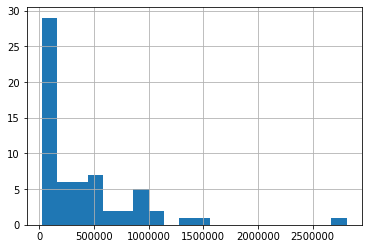

In [22]:
%matplotlib inline
global_ratings.rating.hist(bins=20)